In [2]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
import tensorflow as tf
import numpy as np
import tensorflow as keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import gc

170498071/170498071 [==============================] - 3s 0us/step
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 32, 32, 3)
(50000, 32, 32, 3)
[[[[0.2188  0.2188  0.2188 ]
   [0.1562  0.1562  0.1562 ]
   [0.1875  0.1562  0.1562 ]
   ...
   [0.5938  0.5     0.4062 ]
   [0.5625  0.4688  0.375  ]
   [0.5625  0.4688  0.375  ]]

  [[0.03125 0.0625  0.0625 ]
   [0.      0.      0.     ]
   [0.0625  0.      0.     ]
   ...
   [0.4688  0.3125  0.1875 ]
   [0.4375  0.3125  0.1875 ]
   [0.4688  0.3125  0.2188 ]]

  [[0.09375 0.0625  0.0625 ]
   [0.03125 0.      0.     ]
   [0.1875  0.09375 0.     ]
   ...
   [0.4375  0.3125  0.1875 ]
   [0.4375  0.3125  0.1875 ]
   [0.4062  0.2812  0.1562 ]]

  ...

  [[0.7812  0.6562  0.3438 ]
   [0.7812  0.5938  0.125  ]
   [0.75    0.625   0.09375]
   ...
   [0.5938  0.5     0.25   ]
   [0.1875  0.09375 0.     ]
   [0.1875  0.125   0.0625 ]]

  [[0.6875  0.5312  0.3438 ]
   [0.6562  0.4688  0.1562 ]
   [0.7188  0.5312  0.09375]
   ...
   [0.6875  0.5625  0.3438

(array([ 477286.,       0.,       0.,  522047.,       0.,       0.,
         663001.,       0.,       0.,  792262.,       0.,       0.,
         908196.,       0.,       0.,       0., 1016520.,       0.,
              0., 1105929.,       0.,       0., 1171450.,       0.,
              0., 1233641.,       0.,       0.,       0., 1285528.,
              0.,       0., 1320109.,       0.,       0., 1332021.,
              0.,       0., 1344438.,       0.,       0., 1349219.,
              0.,       0.,       0., 1354174.,       0.,       0.,
        1322568.,       0.,       0., 1280885.,       0.,       0.,
        1229834.,       0.,       0.,       0., 1173629.,       0.,
              0., 1119820.,       0.,       0., 1060621.,       0.,
              0.,  980084.,       0.,       0.,  898802.,       0.,
              0.,       0.,  835706.,       0.,       0.,  766534.,
              0.,       0.,  700447.,       0.,       0.,  636568.,
              0.,       0.,       0.,  577033., 

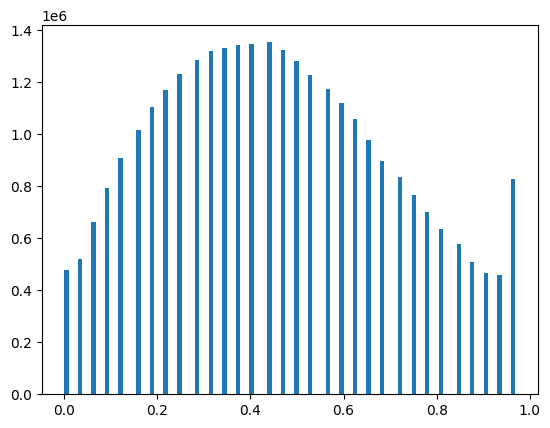

In [3]:
#mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()# mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(y_train)
#print(np.shape(x_train))



#del a
#n = gc.collect()

#plt.imshow(x_test[0,:,:,:])
#plt.show()

#x_train=x_train.reshape((-1, 32*32*3))
#x_test=x_test.reshape((-1, 32*32*3))
#print(np.shape(x_train))

#x_train=x_train[0:30000,:]
#y_train=y_train[0:30000]

x_train2=(x_train).copy()
x_test2=(x_test).copy()

#'''
np.random.seed(1000)
a=(np.array(np.random.rand(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)>0.3)).astype(float)
#a[:,0:16,:]=1
#a[:,16:32,:]=0
a=np.tile(a,(1,1,1,3))
x_train=np.maximum(a,x_train)
#x_train=x_train+a*0.05
#x_train=np.maximum(0,x_train)
#x_train=np.minimum(1.0,x_train)
#print(x_train)

#np.random.seed(1000)
a=(np.array(np.random.rand(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)>0.3)).astype(float)
#a[:,0:16,:]=1
#a[:,16:32,:]=0
a=np.tile(a,(1,1,1,3))
x_test=np.maximum(a,x_test)
#'''

print(np.shape(x_train))
print(np.shape(x_train2))

x_train2=((np.floor(x_train2*(254/255)*32)).astype(int)).astype(np.float16)/32
x_test2=((np.floor(x_test2*(254/255)*32)).astype(int)).astype(np.float16)/32
print(x_train2)

plt.hist(x_test2.flatten(),bins=100)

#y_train2 = np.zeros((y_train.size, y_train.max()+1), dtype=int)
#y_train2[np.arange(y_train.size),y_train] = 1
#y_train2[:,:]=0
#x_train2=np.concatenate((x_train2,307.2*y_train2),axis=1)
#print(np.shape(x_train2))
#print(np.shape(y_train2))

#y_test2 = np.zeros((y_test.size, y_test.max()+1), dtype=int)
#y_test2[np.arange(y_test.size),y_test] = 1
#x_test2[:,:]=0
#x_test2=np.concatenate((x_test2,307.2*y_test2),axis=1)
#print(np.shape(x_test2))
#print(np.shape(y_test2))

In [ ]:
print(x_train)
print(x_test)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [4]:
#'''
dim=5
x_train_new=(np.zeros((x_train.shape[0],32,32,3,dim))).astype(np.uint8)
a2=(x_train*(254/255)*((2**dim)*1-1e-10)).astype(np.float16)
for i in range(0,dim):
    x_train_new[:,:,:,:,i]=a2%2
    a2=a2//2
    #x_train_new[:,:,:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//512
x_train=(np.reshape(x_train_new,(-1,32,32,3*dim)))
del a2
del x_train_new
n = gc.collect()

print('convert each input into 8 dimensions')
x_test_new=np.zeros((x_test.shape[0],32,32,3,dim)).astype(np.uint8)
a2=(x_test*(254/255)*((2**dim)*1-1e-10)).astype(np.float16)
for i in range(0,dim):
    x_test_new[:,:,:,:,i]=a2%2
    a2=a2//2
    #x_test_new[:,:,:,:,i]=(a2%(2*256))/(2*256)
    #a2=a2//512
x_test=(np.reshape(x_test_new,(-1,32,32,3*dim)))
del a2
del x_test_new
n = gc.collect()

print('convert each input into 8 dimensions')



n = gc.collect()

print(np.shape(x_train))

#'''

convert each input into 8 dimensions
convert each input into 8 dimensions
(50000, 32, 32, 15)


In [5]:
#bias_constraint=tf.keras.constraints.NonNeg()
##x_in=Input(shape=(32,32,3*dim,))#
#x_in = Input(shape=(8,))
#x_in2=tf.keras.layers.RandomFlip("horizontal_and_vertical")(x_in)
#x_in3=tf.keras.layers.RandomRotation(0.2)(x_in2)
#x_in4=Flatten()(x_in3)

#Do=tf.keras.layers.GaussianNoise(0.1)(x_in)
#Do=tf.keras.layers.Dropout(.0)(x_in)
##x = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_in, -x_in]))
##x_1 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x, -x]))#400
##x_2 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_1, -x_1,x,-x]))
#x_2_1=Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x, -x]))
##x_3 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_2, -x_2,x,-x]))
#x_3=x_2_1+x_3_1
##x_4 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_3, -x_3,x,-x]))
#x_4_1=Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x, -x]))
##x_5 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_4, -x_4,x,-x]))#([x_4, -x_4]))#,x_in,-x_in
##x_51 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_5, -x_5,x, -x]))#([x_9, -x_9]))
##x_52 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_51, -x_51]))#([x_9, -x_9]))
#x_5=x_5_1+x_4_1

##x_6 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_52, -x_52]))
##x_7 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_6, -x_6,x_52, -x_52]))
#x_7=Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg(),)(Concatenate(axis=1)([x_5, -x_5]))
##x_8 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_7, -x_7,x_52, -x_52]))
#x_8=x_8_1+x_7_1
##x_9 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_8, -x_8,x_52, -x_52]))
#x_9_1 = Dense(800, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_52, -x_52]))
##x_10 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_9, -x_9,x_52, -x_52]))#([x_9, -x_9]))
##x_11 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_10, -x_10,x_52, -x_52]))#([x_9, -x_9]))
##x_12 = Dense(1500, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_11, -x_11,x_52, -x_52]))#([x_9, -x_9]))
##x_out = Dense(32*32*3*dim, activation='sigmoid', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_52, -x_52]))#,x_5,-x_5

##x_out2=tf.reshape(x_out[:,:],[-1,32*32*3,dim])

#for i in range(0,32):
#    x_out3=x_out2[:,:,:,i]*(2**i)
#x_out3=x_out3/(2**32)
##print(x_out2)
##x_out3=(x_out2[:,:,0]*1+x_out2[:,:,1]*2+x_out2[:,:,2]*4+x_out2[:,:,3]*8+x_out2[:,:,4]*16)/32
##print(x_out3)
#+x_out2[:,:,5]*32+x_out2[:,:,6]*64+x_out2[:,:,7]*128)/256
##x_out4_2=tf.reshape(x_out3,[-1,32*32*3])
#x_out5=Dense(10, activation='sigmoid', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_52, -x_52]))
#x_out4=Concatenate(axis=1)([x_out4_2,307.2*x_out5])
##x_out4=x_out4_2
##print(x_out4)
##print(np.shape(x_train2))

#model.summary()
x_in=Input(shape=(32,32,3*dim))
##x_in2=tf.image.resize(x_in, [64, 64])
#x_in2=tf.keras.layers.RandomFlip("horizontal_and_vertical")(x_in)
x=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same', use_bias=True,input_shape=(32, 32, 3*dim),kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_in,-x_in]))#,kernel_constraint=tf.keras.constraints.NonNeg()#8
#mp = tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=None, padding='same')(Concatenate(axis=3)([x, -x]))
x_1=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True,kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x,-x]))
x_2=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True,kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_1,-x_1,x,-x]))


x_3=Conv2D(16,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True,kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_2,-x_2,x,-x]))
x_4=Conv2D(3*dim,kernel_size = (5,5), strides = (1,1), activation='relu', padding='same',use_bias=True,kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_3,-x_3]))#15
x_out=x_4
x_out2=tf.reshape(x_out[:,:],[-1,32,32,3,dim])
#x_out3=x_out2
x_out3=(x_out2[:,:,:,:,0]*1+x_out2[:,:,:,:,1]*2+x_out2[:,:,:,:,2]*4+x_out2[:,:,:,:,3]*8+x_out2[:,:,:,:,4]*16)/32#+x_out2[:,:,:,:,5]*32+x_out2[:,:,:,:,6]*64+x_out2[:,:,:,:,7]*128)/256
#x_out3 = tf.identity(x_out3, name="aut")

#x_b4_1=Conv2D(64,kernel_size = (8,8), strides = (1,1), activation='relu', padding='valid',use_bias=True,kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_b4,-x_b4]))
x_2a=tf.keras.layers.Flatten()(x_out3)
#x_a1 = Dense(32, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_2a, -x_2a]))
#x_a2 = Dense(32, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_a1, -x_a1]))
#x_a3 = Dense(10, activation='sigmoid', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_a2, -x_a2]))
x_out4=x_out3#x_2a
#x_out4 = tf.identity(x_out4, name="cls")
#mp2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=None, padding='same')(Concatenate(axis=3)([x_1, -x_1]))
##x_2=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', padding='same', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_1, -x_1]))
##x2=x_2+x
#mp3 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=None, padding='same')(Concatenate(axis=3)([x_2, -x_2]))
##x_3=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', padding='same', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x2, -x2]))
##x3=x_3+x
##x_4=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', padding='same', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x3, -x3]))
##x4=x_4+x
##x_5=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', padding='same', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x4, -x4]))
##x5=x_5+x
##x_6=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', padding='same', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x5, -x5]))
##x6=x_6+x
#mp4 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=None, padding='same')(Concatenate(axis=3)([x_3, -x_3]))
#x_3=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_2, -x_2]))
#x_4=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_3, -x_3]))
#x_5=Conv2D(64,kernel_size = (3,3), strides = (1,1), activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=3)([x_4, -x_4]))
#max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid')(x_5)
##x_6=Flatten()(x6)
##x_7 = Dense(64, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_6, -x_6]))
#x_8 = Dense(50, activation='relu', kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_7, -x_7]))
##x_out = Dense(10, activation=None, kernel_constraint=tf.keras.constraints.NonNeg())(Concatenate(axis=1)([x_7, -x_7]))#'sigmoid'

#model.summary()

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 15)  0           []                               
                                ]                                                                 
                                                                                                  
 tf.math.negative (TFOpLambda)  (None, 32, 32, 15)   0           ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 32, 32, 30)   0           ['input_1[0][0]',                
                                                                  'tf.math.negative[0][0]']       
                                                                                              

In [8]:
n = gc.collect()

model = Model(inputs=x_in, outputs=x_out4)#[x_out3,x_out4])

for i in range(0,len(model.layers)):
    model.layers[i].trainable == True

losses = {'tf.identity':
 "mae",'tf.identity_1':
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
}
lossWeights = { 20.0,  1.0}

# compile the keras model
optimizer = keras.optimizers.Adam(lr=1)#0.000001)#lr=0.001#0.0001
#optimizer = keras.optimizers.experimental.SGD(learning_rate=0.1)
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])#optimizer='adam'
model.compile(loss='mae', optimizer=optimizer)#, metrics=['accuracy']
#model.compile(loss=losses, optimizer=optimizer,metrics=['accuracy'])#, metrics=['accuracy']
# fit the keras model on the dataset
#model.fit(x=x_train, y=y_train, verbose=1, epochs=150, batch_size=32, validation_data=(x_test, y_test))#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000
model.fit(x=x_train, y=x_train2, verbose=1, epochs=50, batch_size=30, validation_data=(x_test, x_test2))#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000

#model.fit(x=x_train, y={'tf.identity':x_train2,'tf.identity_1':y_train}, verbose=1, epochs=150, batch_size=100, validation_data=(x_test, {'tf.identity':x_test2,'tf.identity_1':y_test}),shuffle=True)#1500 #epochs=150, batch_size=100#epochs=1500, batch_size=60000

# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
#_, accuracy = model.evaluate(x_test, x_test2)
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50


KeyboardInterrupt: ignored

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint1')

In [9]:
model.load_weights('./checkpoints/my_checkpoint1')
accuracy = model.evaluate(x_test, x_test2)
print(accuracy)

313/313 [==============================] - 3s 7ms/step - loss: 0.0411
0.0410677008330822


1/1 [==============================] - 0s 20ms/step


<ipython-input-10-2b82f82bd473>:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


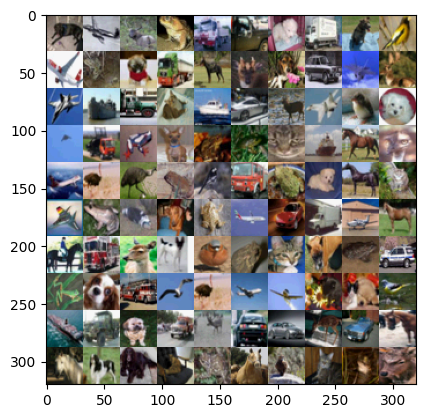

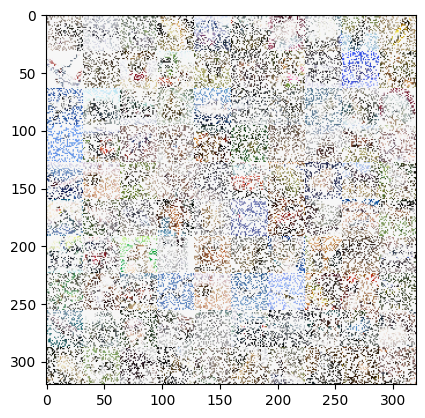

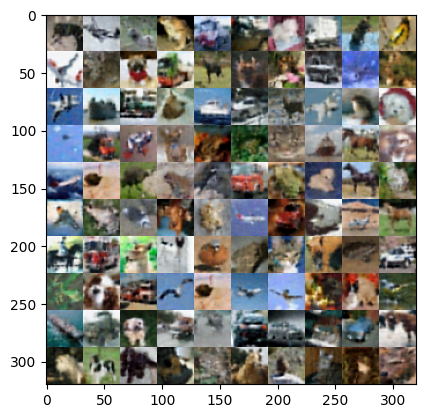

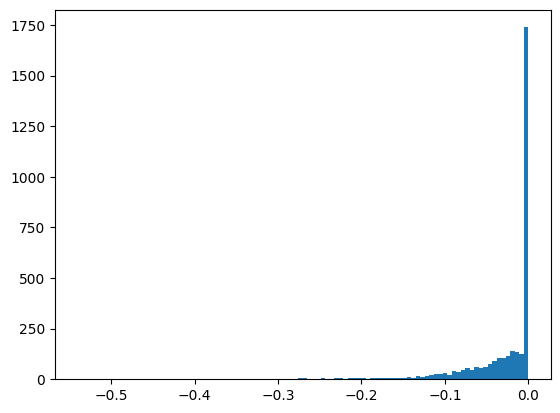

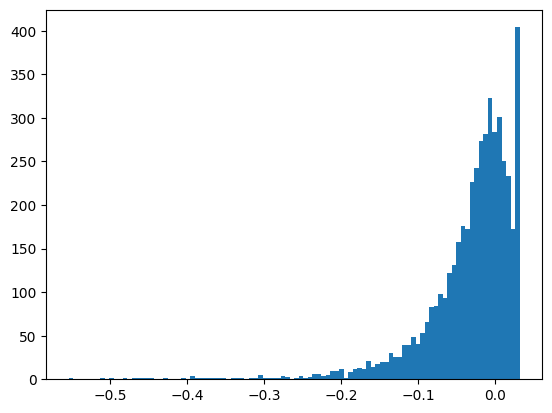

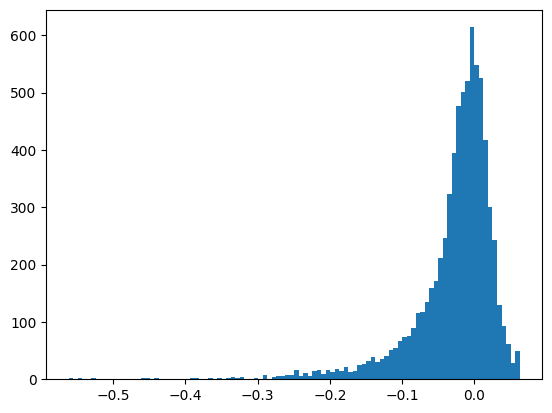

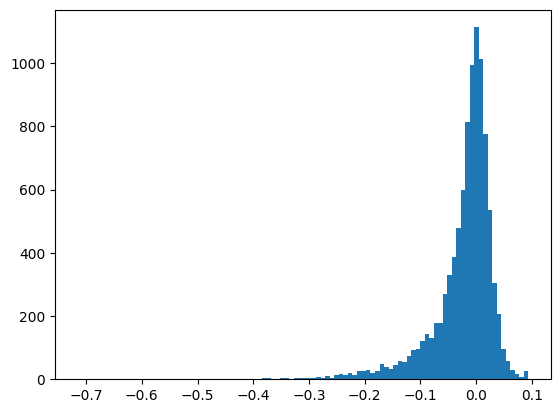

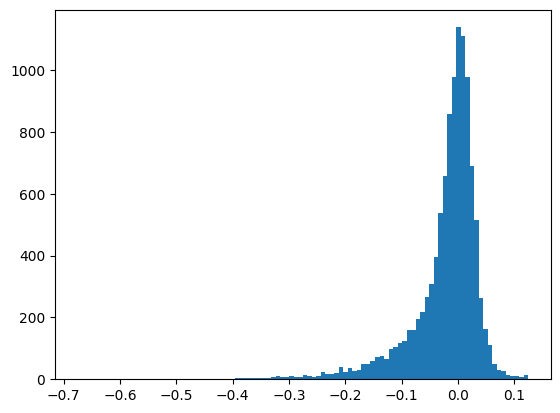

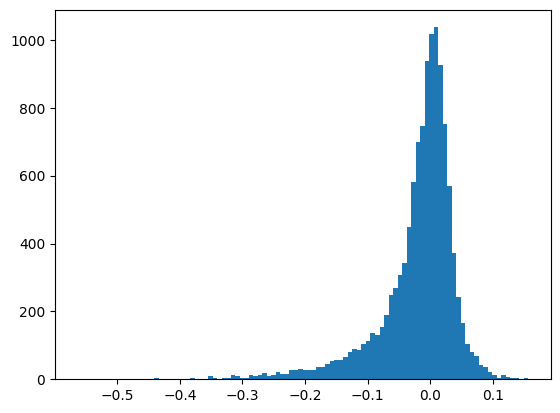

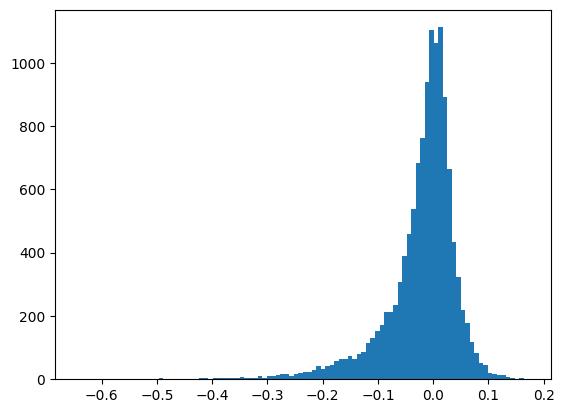

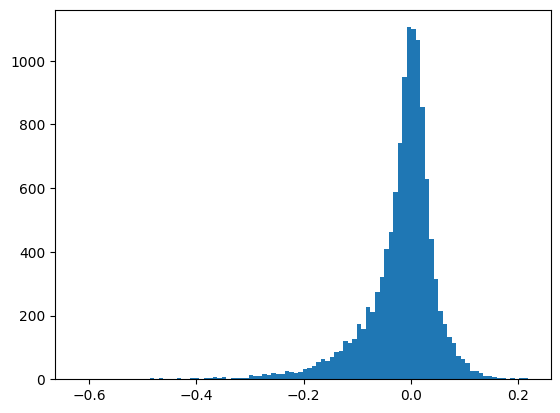

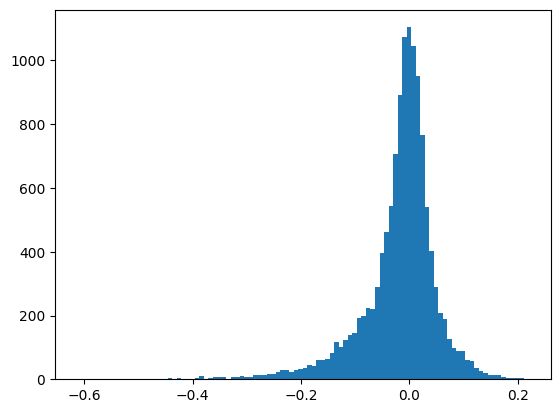

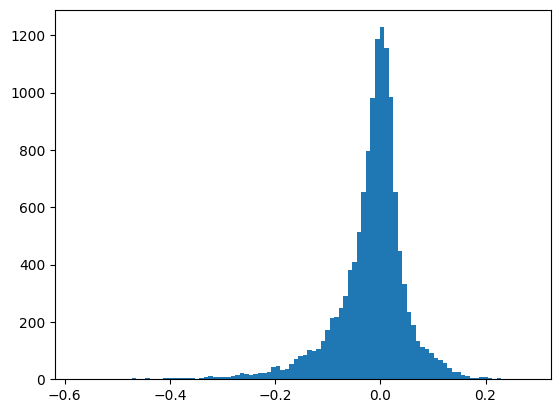

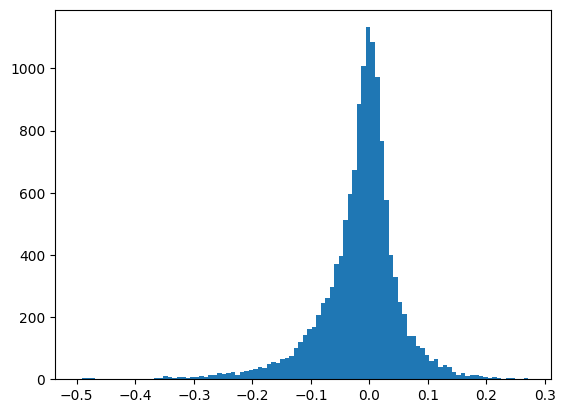

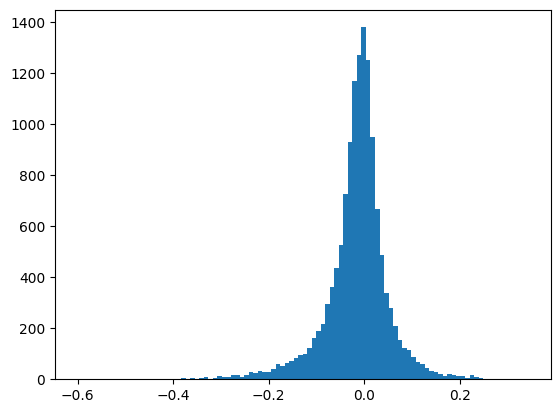

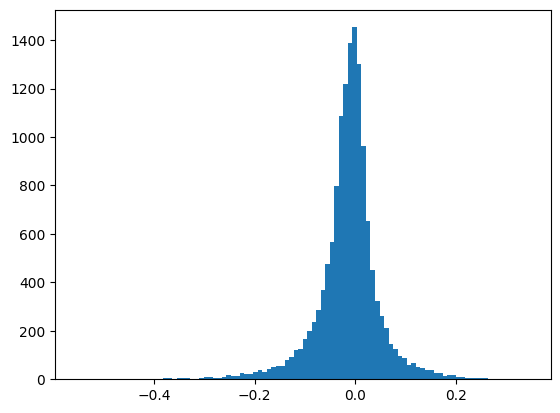

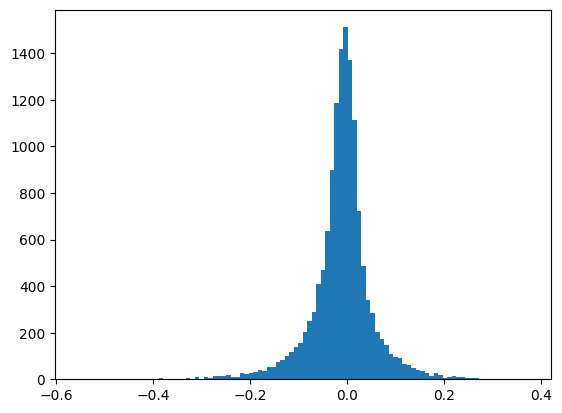

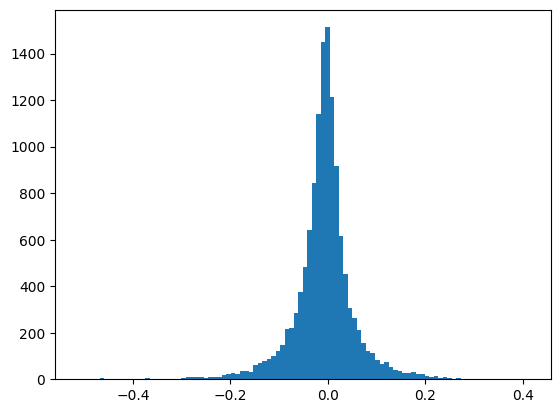

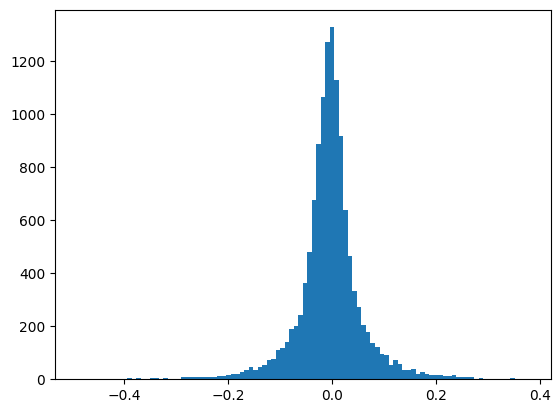

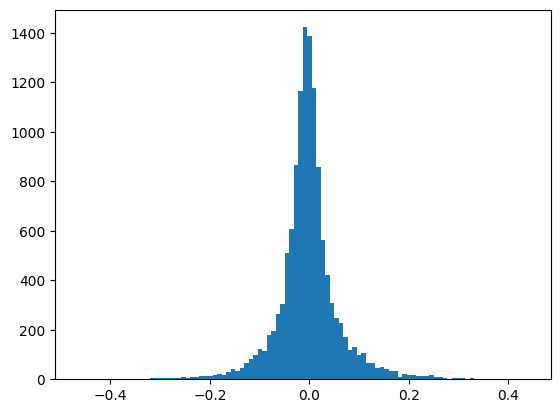

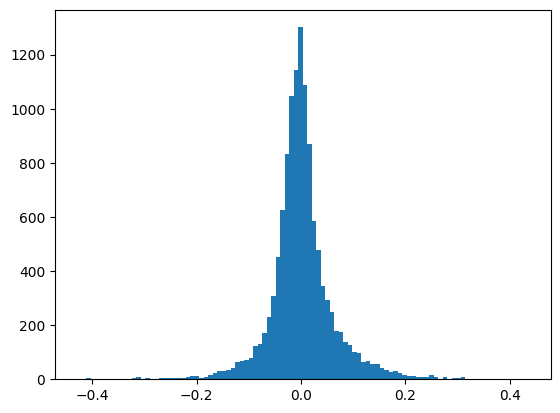

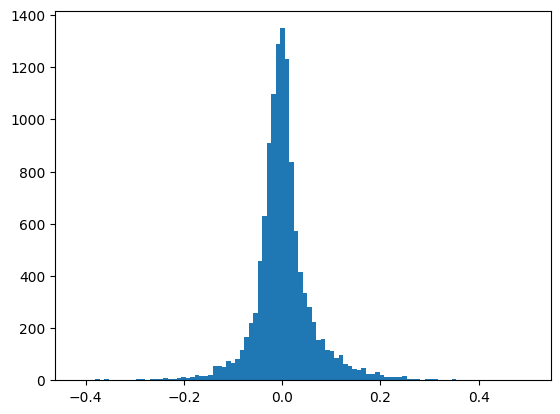

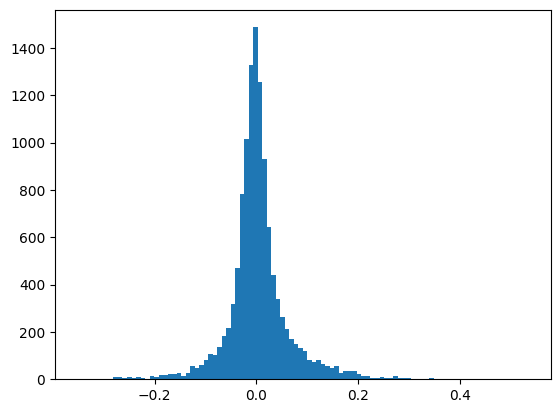

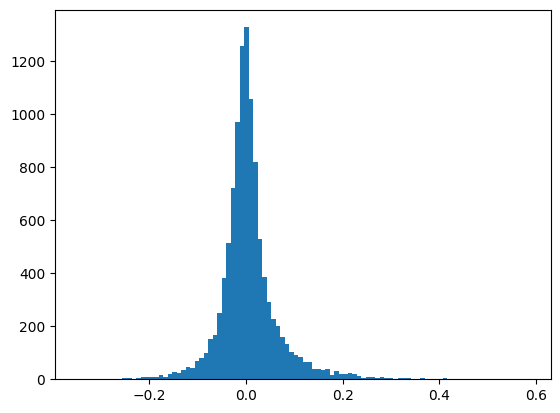

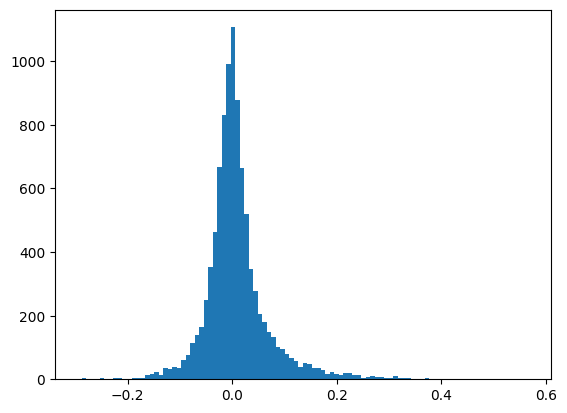

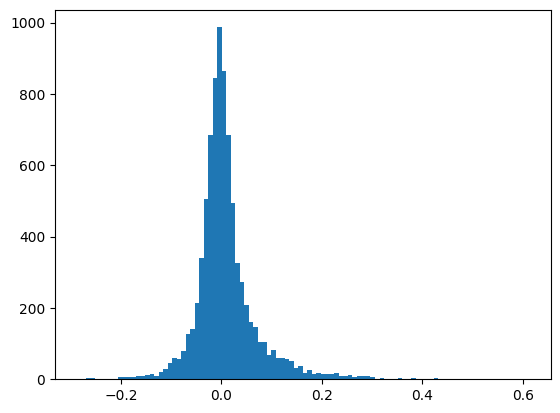

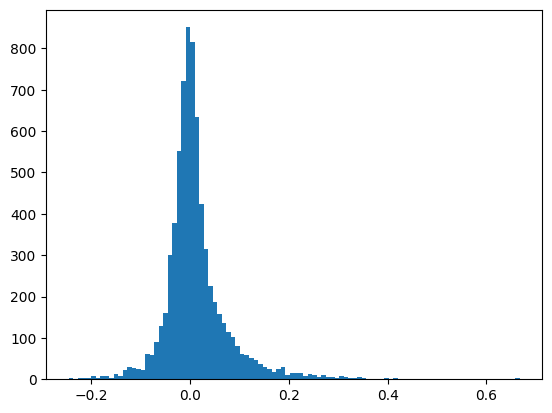

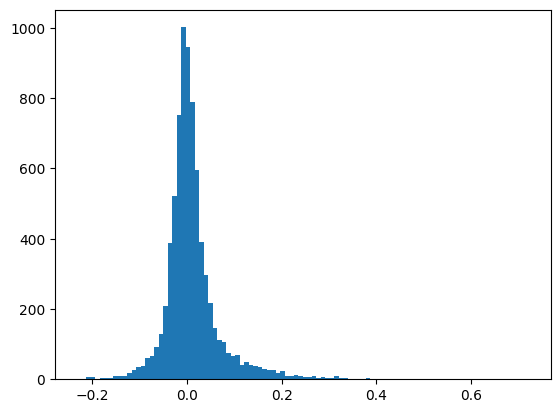

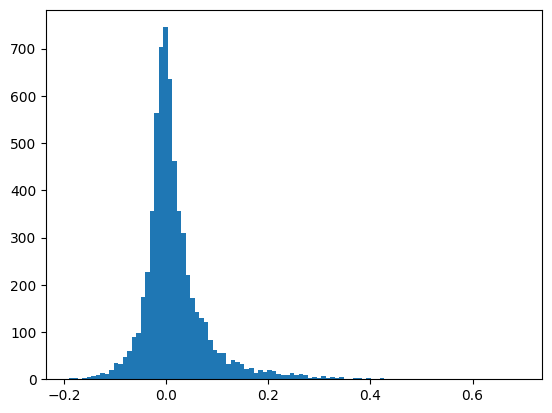

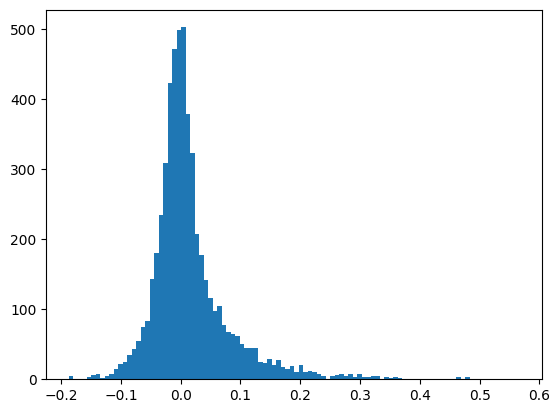

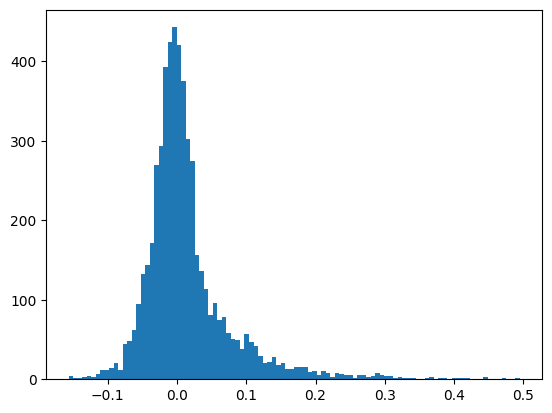

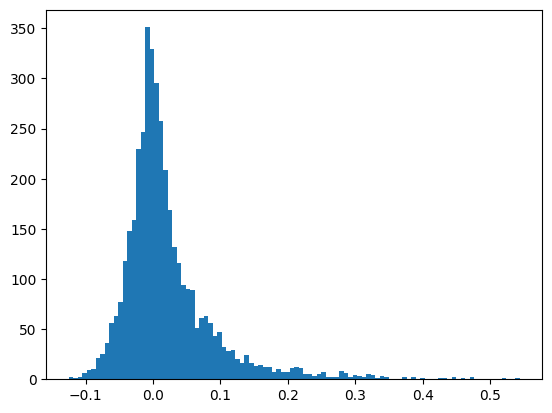

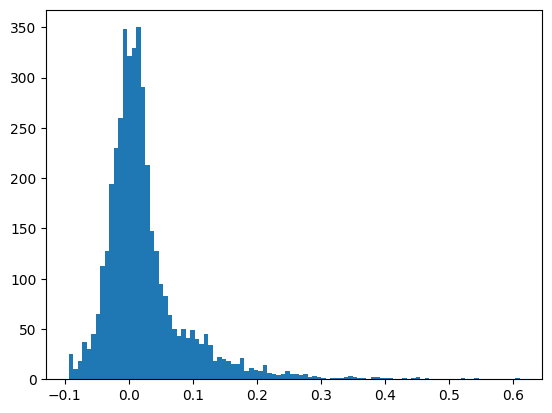

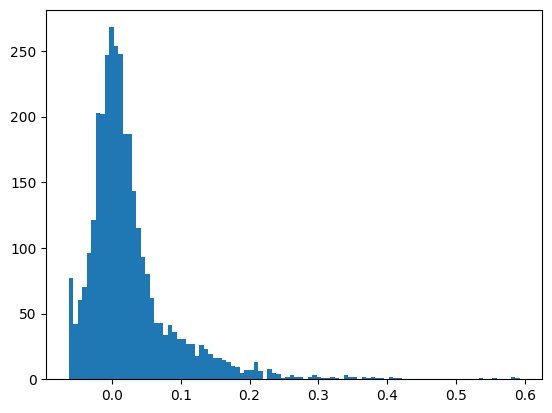

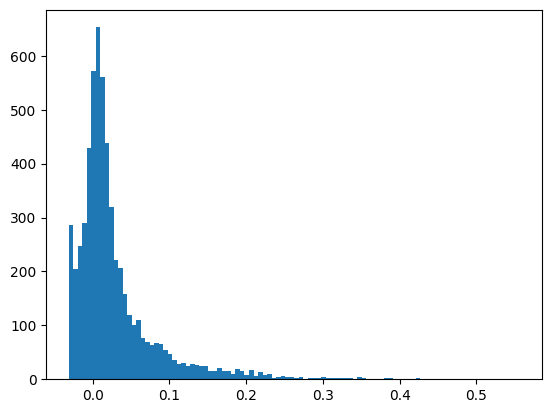

0.024594321846961975
0.042085031509657256


In [ ]:
test_out_big=np.zeros((32*10,32*10,3))
test_in_big=np.zeros((32*10,32*10,3))
test_in_save_big=np.zeros((32*10,32*10,3))
np.random.seed(7777)
for i in range(0,10):
    for j in range(0,10):
        b=int(np.floor(np.random.rand(1)*10000))
        #print(x_train[b,:])
        #print(x_test[b,:])
        test_in=np.reshape(x_test[b,:],(32,32,3*dim))
        test_in2=np.reshape(x_test2[b,:],(32,32,3))
        #np.random.seed(1000)
        #a=(np.array(np.random.rand(32,32,3)>0.3)).astype(float)#0.3,0.95
        #a=np.tile(np.reshape(a,(32,32,3, 1)),(1,1,1,5))
        #a=np.reshape(a,(32,32,15))
        #print(np.shape(a))
        test_in_save=test_in.copy()
        test_in_save=np.reshape(test_in_save,(32,32,3,dim))
        #test_in=np.maximum(a,test_in)
        test_out=model.predict(np.reshape(test_in,(1,32,32,3*dim)))
        #test_out=model.predict(np.reshape(test_out,(1,32,32,3*dim)))
        test_in=np.reshape(test_in,(32,32,3,dim))
        #print(test_out)
        test_out=np.reshape(test_out,(32,32,3))
        #test_out=test_out[1,:,:]
        test_out_big[i*32:(i+1)*32,j*32:(j+1)*32,:]=np.minimum(test_out,1) #test_out[:,:,0]*1+test_out[:,:,1]*2+test_out[:,:,2]*4+test_out[:,:,3]*8+test_out[:,:,4]*16+test_out[:,:,5]*32+test_out[:,:,6]*64+test_out[:,:,7]*128
        test_in_big[i*32:(i+1)*32,j*32:(j+1)*32,:]=test_in[:,:,:,0]*1+test_in[:,:,:,1]*2+test_in[:,:,:,2]*4+test_in[:,:,:,3]*8+test_in[:,:,:,4]*16#+test_in[:,:,5]*32+test_in[:,:,6]*64+test_in[:,:,7]*128
        #test_in_big[i*28:(i+1)*28,j*28:(j+1)*28]=test_in[:,:,0]*1+test_in[:,:,1]*2+test_in[:,:,2]*4+test_in[:,:,3]*8
        test_in_save_big[i*32:(i+1)*32,j*32:(j+1)*32,:]=test_in2#test_in_save[:,:,:,0]*1+test_in_save[:,:,:,1]*2+test_in_save[:,:,:,2]*4+test_in_save[:,:,:,3]*8+test_in_save[:,:,:,4]*16#+test_in_save[:,:,5]*32+test_in_save[:,:,6]*64+test_in_save[:,:,7]*128
plt.figure()
plt.imshow(test_in_save_big)
plt.figure()
plt.imshow(test_in_big/32)
plt.figure()
plt.imshow(test_out_big)
#for i in range(0,32):
#    plt.figure()
#    plt.hist((test_out_big[:]-test_in_save_big[]),bins=100)

for i in range(0,32):
    plt.figure()
    plt.hist(test_in_save_big[np.bitwise_and(test_in_save_big[:]>=(i-0.5)/32, test_in_save_big[:]<=(i+0.5)/32)]-test_out_big[np.bitwise_and(test_in_save_big[:]>=(i-0.5)/32, test_in_save_big[:]<=(i+0.5)/32)],bins=100)

plt.show()

from PIL import Image
im = Image.fromarray((np.minimum(np.maximum(test_in_save_big*255,0),255)).astype(np.uint8))
im.save("gt.png")
im = Image.fromarray((np.minimum(np.maximum(test_in_big/32*255,0),255)).astype(np.uint8))
im.save("in.png")
im = Image.fromarray((np.minimum(np.maximum(test_out_big*255,0),255)).astype(np.uint8))
im.save("out.png")

print(np.median(np.abs((test_in_save_big-test_out_big).flatten())))
print(np.mean(np.abs((test_in_save_big-test_out_big).flatten())))